# Computing Granville's $V'_f$

Computing Granville's $\kappa_f'$ constant requires the computation of what he calls $V_f'$, defined to be the area of $$\left\{ (x,y) \in \mathbb{R}^2 : |F(x,y)| \leq 1 \right\}.$$ This notebook will compute this for our three $f$ polynomials corresponding to $X_1(13)$, $X_1(16)$, and $X_1(18)$. 

First, we need to import some libraries:

In [3]:
import numpy as np
import matplotlib.pylab as plt
from shapely.geometry import Polygon

Next we try to visualise the region we want to get the area of: here we do this for $X_1(16)$; the other cases will be dealt with below.

<a list of 8 text.Text objects>

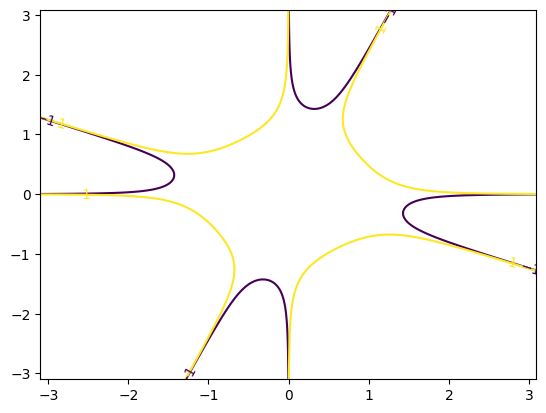

In [4]:
# Generate some test data.
delta = 0.01
x = np.arange(-3.1, 3.1, delta)
y = np.arange(-3.1, 3.1, delta)
X, Z = np.meshgrid(x, y)
F = X*Z*(X**2+Z**2)*(X**2+2*X*Z-Z**2)  # this is what Granville defines as F(x,z)

# Plot the data
levels = [-1.0,1.0]
cs = plt.contour(X,Z,F,levels=levels)
plt.clabel(cs, inline=False, fontsize=10)

We see that we have this star region, with these spiky cusps going off to infinity. This is the region whose area we need.

The following code unifies the coordinates of the boundary of this region into a single numpy array.

/tmp/ipykernel_12917/4165769076.py:3: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour = cs.collections[i]


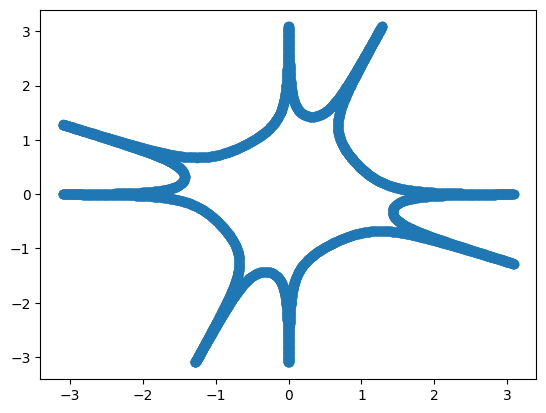

In [5]:
paths_to_concat = []
for i in range(len(levels)):
    contour = cs.collections[i]
    # vs = contour.get_paths()[0].vertices
    paths = contour.get_paths()
    for path in paths:
        vs = path.vertices
        paths_to_concat.append(vs)

contour=np.concatenate(paths_to_concat,axis=0)
plt.scatter(contour[:, 0], contour[:, 1])
plt.show()

To get the area, we will approximate the region with a polygon from the given array of points. This requires them to be sorted in a radial fashion. The following helper function will achieve this for us.

In [6]:
def radial_sort_line(x, y):
    """Sort unordered verts of an unclosed line by angle from their center."""
    # Radial sort
    x0, y0 = x.mean(), y.mean()
    angle = np.arctan2(y - y0, x - x0)

    idx = angle.argsort()
    x, y = x[idx], y[idx]

    # Split at opening in line
    dx = np.diff(np.append(x, x[-1]))
    dy = np.diff(np.append(y, y[-1]))
    max_gap = np.abs(np.hypot(dx, dy)).argmax() + 1

    x = np.append(x[max_gap:], x[:max_gap])
    y = np.append(y[max_gap:], y[:max_gap])
    return x, y

We now use it to sort out unified contour, and generate a shapely Polygon from it.

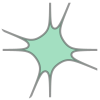

In [7]:
x = contour[:, 0]
y = contour[:, 1]

x, y = radial_sort_line(x, y)
contour = np.column_stack((x,y))
polygon = Polygon(contour)
polygon

Now we can get the area of this region as follows.

In [8]:
polygon.area

6.132666484981952

### $X_1(13)$

Having seen the idea, the rest of the notebook will be less verbose.

<a list of 1 text.Text objects>

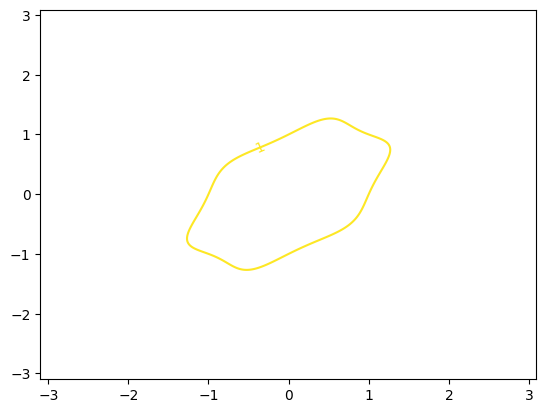

In [9]:
# Generate some test data.
delta = 0.01
x = np.arange(-3.1, 3.1, delta)
y = np.arange(-3.1, 3.1, delta)
X, Z = np.meshgrid(x, y)
F = X**6 - 2*Z*X**5 + (Z**2)*(X**4) - 2*(Z**3)*(X**3) + 6*(Z**4)*(X**2) - 4*(Z**5)*X + Z**6

# Plot the data
levels = [-1.0,1.0]
cs = plt.contour(X,Z,F,levels=levels)
plt.clabel(cs, inline=False, fontsize=10)

/tmp/ipykernel_12917/4165769076.py:3: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour = cs.collections[i]


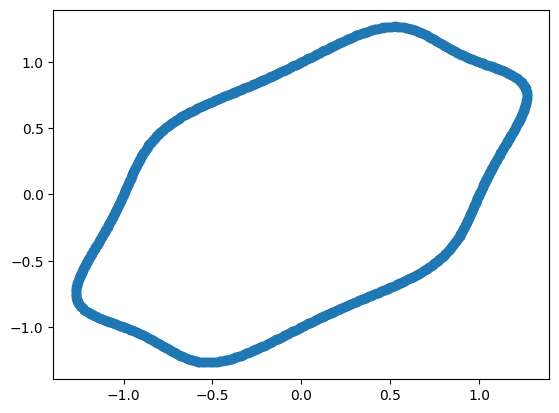

In [10]:
paths_to_concat = []
for i in range(len(levels)):
    contour = cs.collections[i]
    # vs = contour.get_paths()[0].vertices
    paths = contour.get_paths()
    for path in paths:
        vs = path.vertices
        paths_to_concat.append(vs)

contour=np.concatenate(paths_to_concat,axis=0)
plt.scatter(contour[:, 0], contour[:, 1])
plt.show()

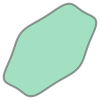

In [11]:
x = contour[:, 0]
y = contour[:, 1]

x, y = radial_sort_line(x, y)
contour = np.column_stack((x,y))
polygon = Polygon(contour)
polygon

In [12]:
polygon.area

3.9325551449299807

### $X_1(18)$

<a list of 1 text.Text objects>

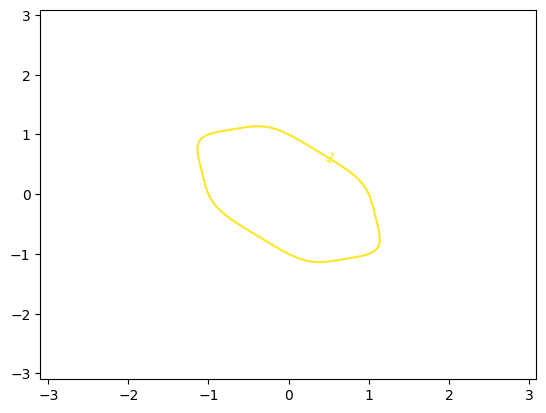

In [13]:
# Generate some test data.
delta = 0.01
x = np.arange(-3.1, 3.1, delta)
y = np.arange(-3.1, 3.1, delta)
X, Z = np.meshgrid(x, y)
F = X**6 + 2*Z*X**5 + 5*(Z**2)*(X**4) + 10*(Z**3)*(X**3) + 10*(Z**4)*(X**2) + 4*(Z**5)*X + Z**6

# Plot the data
levels = [-1.0,1.0]
cs = plt.contour(X,Z,F,levels=levels)
plt.clabel(cs, inline=False, fontsize=10)

/tmp/ipykernel_12917/4165769076.py:3: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour = cs.collections[i]


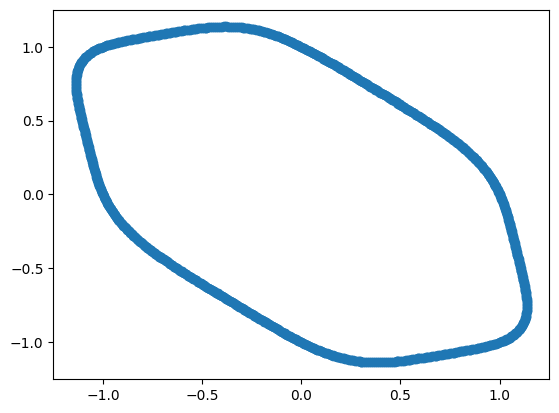

In [14]:
paths_to_concat = []
for i in range(len(levels)):
    contour = cs.collections[i]
    # vs = contour.get_paths()[0].vertices
    paths = contour.get_paths()
    for path in paths:
        vs = path.vertices
        paths_to_concat.append(vs)

contour=np.concatenate(paths_to_concat,axis=0)
plt.scatter(contour[:, 0], contour[:, 1])
plt.show()

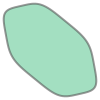

In [15]:
x = contour[:, 0]
y = contour[:, 1]

x, y = radial_sort_line(x, y)
contour = np.column_stack((x,y))
polygon = Polygon(contour)
polygon

In [16]:
polygon.area

3.517982630376745